# <span style="color:#F72585">Modelo Logístico de Clasificación  con Tensorflow 2.X</span>

## <span style="color:#4361EE">Introducción</span> 

Este código fue tomado y  adaptado de [Google Colab](https://colab.research.google.com/drive/1qNxKmi0QpkunqTDdpXfVLlneG-NFDN9c). En este ejercicio usaremos el famoso conjunto de datos *iris*. Sin embargo no se usarán todos los datos, porque en este ejercicio vamos a introducir el modelo logístico clásico que permite separar en dos clases. Los datos de la primera clase son omitidos y los datos se recodifican para tener solamente dos clases. Próximamente usaremos todos los datos.

## <span style="color:#4361EE">El modelo lineal de clasificación</span>

En este  modelo se tienen varias variables regresoras o explicativas de entrada y una variable dicotómica de salida.

El propósito central es construir un modelo para predecir la probabilidad de que los elementos del espacio de entrada pertenezcan a una de dos clases, las cuales denotaremos como 0 y 1 respectivamente.

Supongamos que tenemos dos variables $X_1$ y $X_2$ que se espera permitan predecir si un elemento del conjunto de entrada pertenece a una clase: clase 1 ($Y=1$) o clase 0 ($Y=0$).

El modelo desde el punto de vista estadístico se escribe como:

$$
[Y_i|X_1=x_{i1},X_2=x_{i2}] \sim \text{Bernoulli}(\pi_i),
$$

en donde:

$$
\pi_i = \frac{1}{1 + exp(-[b +w_1x_{i1} + w_2x_{i2})]}, i =1,\cdots,N
$$

En el entrenamiento se encontrarán los pesos $w_1,w_2,$ y el intercepto $b$ que minimizan una determinada función de pérdida, a partir de un conjunto de datos de entrenamiento. 


Una vez garantizado que la máquina generaliza bien, probando con los datos de validación, la expresión anterior se utiliza para predecir la probabilidad que un nuevo valor no observado en el espacio de entrada, digamos $(x_1,x_2)$ pertenezca a una clase. 

Por construcción $\pi$ es la probabilidad que el elemento $x$ pertenezca a la clase $1$. Por lo tanto si por ejemplo $\pi = 0.8$ para un elemento, entonces lo clasificamos en la clase $1$. 


La idea central que está detrás de este tipo de modelos se puede apreciar en la siguete imagen.



<figure>
<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Libro-Fundamentos/main/Machine_Learning/Imagenes/clasificador_lineal.png" width="600" height="400" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Clasificador Lineal</p>
</figcaption>
</figure>

Se trata de un clasificador lineal simple. Vamos a suponer que la máquina de aprendizaje ya está entrenada, por lo que los parámetros $w,b$ están fijos.

Observe que la línea roja divide el espacio $\mathbb{R}^2$ en  tres regiones. La primera es justamente la recta, que corresponde a un modelo de regresión como se estudio en la lección de [regresión lineal](am_intro_regresion.ipynb). Sobre la línea se cumple la ecuación:

$$
wx+b =0.
$$

Por otro lado se tiene que si $wx+b=0$, entonces la probabilidad $\pi$ es dada en este caso por:

$$
\pi = \frac{1}{1+exp(-(wx+b))} = \frac{1}{2}.
$$

La segunda región está a la derecha. Usted puede verificar que en este caso, para todos los valores de $x$ se tiene que  $wx+b>0$. Como consecuencia, se tiene que $\pi>\tfrac{1}{2}$. En el caso extremo para valores $x$ muy alejados hacia la derecha, se tiene que $wx+b\to \infty$ y en consecuencia $\pi\to 1$.


En la tercera región (a la izquierda) ocurre el comportamiento simétrico pero en el otro sentido. Ahora $wx+b<0$, para todos los valores de $x$.  Se tiene que $\pi<\tfrac{1}{2}$. En el caso extremo para valores $x$ muy alejados hacia la izquierda, se tiene que $wx+b\to -\infty$ y en consecuencia $\pi\to 0$.



### <span style="color:#4CC9F0">Conclusión</span>

El separador lineal funciona de la siguiente forma en este caso:

1. Si $\pi(x)$ es mayor que $0.5$, la clase que debe asignar es $1$. Entre mayor es $\pi(x)$ mayor tranquilidad para asignar la clase $1$ al elemento $x$ en el espacio de entrada.
2. Si $\pi(x)$ es menor que $0.5$, la clase que debe asignar es $0$. Entre menor es $\pi(x)$ mayor tranquilidad para asignar la clase $0$ al elemento $x$ en el espacio de entrada.
3. Si $\pi(x)=0.5$, no se puede asignar una clase. Para valores muy cercanos a $0.5$, no se debe asignar una clase directamente. Si fuera necesario tomar una decisión, lo mejor es seleccionar la clase de forma aleatoria. Como regla de combate, si $0.48 \le \pi(x)\le 0.52$, seleccionar aleatoriamente.

## <span style="color:#4361EE">Importar los módulos requeridos</span>

In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd
import seaborn as sb
import tensorflow as tf
from tensorflow import keras
from tensorflow.estimator import LinearClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(tf.__version__)

2.8.0


## <span style="color:#4361EE">Carga del conjunto de datos Iris</span>

In [4]:
# nombres de las columnas de los datos
col_names = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
target_dimensions = ['Setosa', 'Versicolor', 'Virginica']

# lee los datos
training_data_path = tf.keras.utils.get_file("iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_data_path = tf.keras.utils.get_file("iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")
training = pd.read_csv(training_data_path, names=col_names, header=0)
test = pd.read_csv(test_data_path, names=col_names, header=0)

In [5]:
test

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.9,3.0,4.2,1.5,1
1,6.9,3.1,5.4,2.1,2
2,5.1,3.3,1.7,0.5,0
3,6.0,3.4,4.5,1.6,1
4,5.5,2.5,4.0,1.3,1
5,6.2,2.9,4.3,1.3,1
6,5.5,4.2,1.4,0.2,0
7,6.3,2.8,5.1,1.5,2
8,5.6,3.0,4.1,1.3,1
9,6.7,2.5,5.8,1.8,2


In [6]:
# esta sección es para omitir la clase 0: "Setosa" 
training = training[training['Species'] >= 1]
# recodificar los datos  de entrenamiento de manera que las clases pasen de '1' y '2' a '0' y '1'
training['Species'] = training['Species'].replace([1,2], [0,1])

# esta sección es para omitir la clase 0: "Setosa"
test = test[test['Species'] >= 1]
# recodificar los datos  de entrenamiento de manera que las clases pasen de '1' y '2' a '0' y '1'
test['Species'] = test['Species'].replace([1,2], [0,1])

# omite los índices de los dos dataframes para poderlos concatenar
training.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

# concatena los dataframes
iris_dataset = pd.concat([training, test], axis=0)
iris_dataset.reset_index(drop=True, inplace=True)

/tmp/ipykernel_86082/3984255385.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Species'] = test['Species'].replace([1,2], [0,1])


In [7]:
iris_dataset

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,1
1,5.0,2.3,3.3,1.0,0
2,4.9,2.5,4.5,1.7,1
3,6.9,3.1,5.1,2.3,1
4,6.7,3.1,4.4,1.4,0
...,...,...,...,...,...
95,5.8,2.7,3.9,1.2,0
96,6.1,3.0,4.6,1.4,0
97,6.7,3.1,4.7,1.5,0
98,6.7,3.3,5.7,2.5,1


In [8]:
iris_dataset.index

RangeIndex(start=0, stop=100, step=1)

## <span style="color:#4361EE">Acercamiento descriptivo a los datos</span>

In [9]:
iris_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SepalLength,100.0,6.262,0.662834,4.9,5.800,6.3,6.700,7.9
SepalWidth,100.0,2.872,0.332751,2.0,2.700,2.9,3.025,3.8
PetalLength,100.0,4.906,0.825578,3.0,4.375,4.9,5.525,6.9
PetalWidth,100.0,1.676,0.424769,1.0,1.300,1.6,2.000,2.5
Species,100.0,0.500,0.502519,0.0,0.000,0.5,1.000,1.0


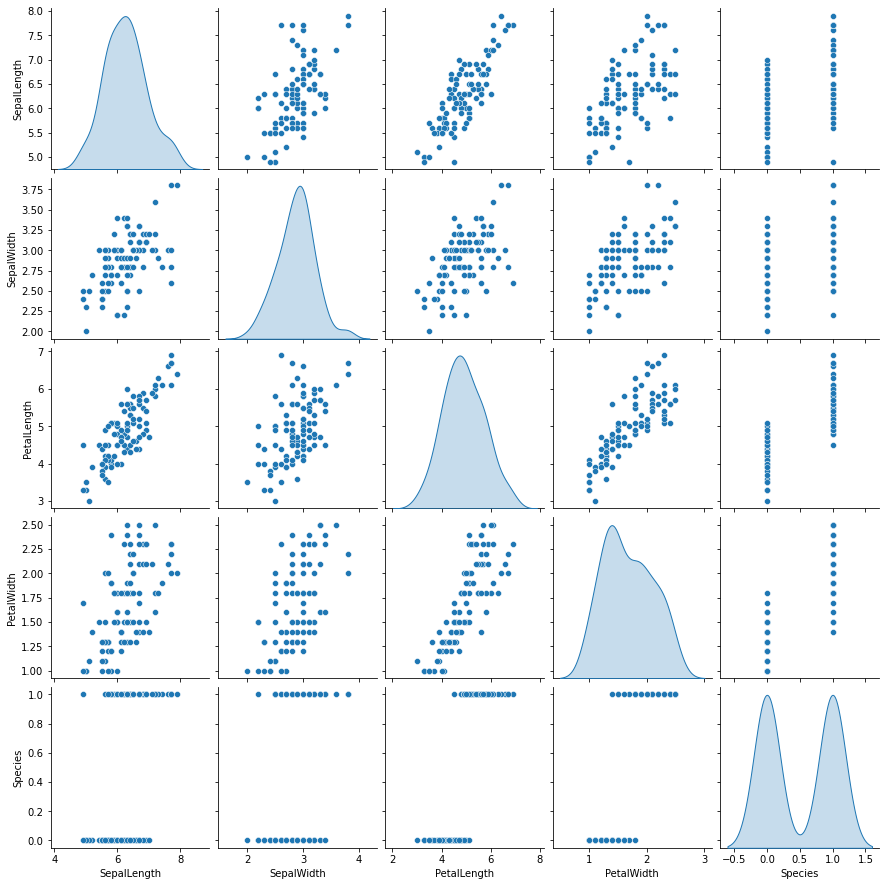

In [10]:
sb.pairplot(iris_dataset, diag_kind='kde')

In [11]:
correlation_data = iris_dataset.corr()
correlation_data.style.background_gradient(cmap='coolwarm', axis=None)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
SepalLength,1.000000,0.553855,0.828479,0.593709,0.494305
SepalWidth,0.553855,1.000000,0.519802,0.566203,0.308080
PetalLength,0.828479,0.519802,1.000000,0.823348,0.786424
PetalWidth,0.593709,0.566203,0.823348,1.000000,0.828129
Species,0.494305,0.308080,0.786424,0.828129,1.000000


## <span style="color:#4361EE">Separa features y targets</span>

In [12]:
X_data = iris_dataset[[m for m in iris_dataset.columns if m not in ['Species']]]
Y_data = iris_dataset[['Species']]

In [13]:
X_data

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,6.9,3.1,5.1,2.3
4,6.7,3.1,4.4,1.4
...,...,...,...,...
95,5.8,2.7,3.9,1.2
96,6.1,3.0,4.6,1.4
97,6.7,3.1,4.7,1.5
98,6.7,3.3,5.7,2.5


## <span style="color:#4361EE">Divide los datos: entrenamiento y validación</span>

In [14]:
training_features, test_features, training_labels, test_labels = train_test_split(X_data, Y_data, test_size=0.2)

In [15]:
print('No. of rows in Training Features: ', training_features.shape[0])
print('No. of rows in Test Features: ', test_features.shape[0])
print('No. of columns in Training Features: ', training_features.shape[1])
print('No. of columns in Test Features: ', test_features.shape[1])

print('No. of rows in Training Label: ', training_labels.shape[0])
print('No. of rows in Test Label: ', test_labels.shape[0])
print('No. of columns in Training Label: ', training_labels.shape[1])
print('No. of columns in Test Label: ', test_labels.shape[1])

No. of rows in Training Features:  80
No. of rows in Test Features:  20
No. of columns in Training Features:  4
No. of columns in Test Features:  4
No. of rows in Training Label:  80
No. of rows in Test Label:  20
No. of columns in Training Label:  1
No. of columns in Test Label:  1


In [16]:
stats = training_features.describe()
stats = stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
SepalLength,80.0,6.28250,0.686907,4.9,5.775,6.3,6.700,7.9
SepalWidth,80.0,2.86250,0.351264,2.0,2.600,2.9,3.100,3.8
PetalLength,80.0,4.92250,0.829362,3.0,4.400,4.9,5.525,6.9
PetalWidth,80.0,1.67125,0.421628,1.0,1.300,1.6,2.000,2.5


In [17]:
stats = test_features.describe()
stats = stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
SepalLength,20.0,6.180,0.564381,5.2,5.875,6.1,6.325,7.6
SepalWidth,20.0,2.910,0.248998,2.4,2.775,2.9,3.000,3.4
PetalLength,20.0,4.840,0.828061,3.5,4.075,4.8,5.450,6.6
PetalWidth,20.0,1.695,0.447772,1.0,1.300,1.8,2.125,2.4


## <span style="color:#4361EE">Normaliza los datos</span>

In [18]:
def norm(x):
  stats = x.describe()
  stats = stats.transpose()
  return (x - stats['mean']) / stats['std']

normed_train_features = norm(training_features)
normed_test_features = norm(test_features)

## <span style="color:#4361EE">Construye la tuberia (pipeline) para la alimentación de datos de Tensorflow</span>

In [19]:
def feed_input(features_dataframe, target_dataframe, num_of_epochs=10, shuffle=True, batch_size=32):
  def input_feed_function():
    dataset = tf.data.Dataset.from_tensor_slices((dict(features_dataframe), target_dataframe))
    if shuffle:
      dataset = dataset.shuffle(2000)
    dataset = dataset.batch(batch_size).repeat(num_of_epochs)
    return dataset
  return input_feed_function

train_feed_input = feed_input(normed_train_features, training_labels)
train_feed_input_testing = feed_input(normed_train_features, training_labels, num_of_epochs=1, shuffle=False)
test_feed_input = feed_input(normed_test_features, test_labels, num_of_epochs=1, shuffle=False)

## <span style="color:#4361EE">Entrenamiento del Modelo</span>

In [20]:
feature_columns_numeric = [tf.feature_column.numeric_column(m) for m in training_features.columns]

In [21]:
logistic_model = LinearClassifier(feature_columns=feature_columns_numeric)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp2ib57s_d', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [22]:
feature_columns_numeric

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [23]:
logistic_model.train(train_feed_input)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.


2022-05-20 20:42:17.399064: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-20 20:42:17.399100: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-20 20:42:17.399143: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kamilo44): /proc/driver/nvidia/version does not exist
/home/kamilo44/anaconda3/lib/python3.9/site-packages/tensorflow_estimator/python/estimator/canned/linear.py:1468: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self.bias = self.add_variable(


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


2022-05-20 20:42:18.278900: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp2ib57s_d/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 30...
INFO:tensorflow:Saving checkpoints for 30 into /tmp/tmp2ib57s_d/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 30...
INFO:tensorflow:Loss for final step: 0.2710461.


## <span style="color:#4361EE">Predicciones</span>

In [24]:
train_predictions = logistic_model.predict(train_feed_input_testing)
test_predictions = logistic_model.predict(test_feed_input)

In [25]:
train_predictions_series = pd.Series([p['classes'][0].decode("utf-8")   for p in train_predictions])
test_predictions_series = pd.Series([p['classes'][0].decode("utf-8")   for p in test_predictions])

INFO:tensorflow:Calling model_fn.


/home/kamilo44/anaconda3/lib/python3.9/site-packages/tensorflow_estimator/python/estimator/canned/linear.py:1468: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self.bias = self.add_variable(


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp2ib57s_d/model.ckpt-30
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.


/home/kamilo44/anaconda3/lib/python3.9/site-packages/tensorflow_estimator/python/estimator/canned/linear.py:1468: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self.bias = self.add_variable(


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp2ib57s_d/model.ckpt-30
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [26]:
train_predictions_df = pd.DataFrame(train_predictions_series, columns=['predictions'])
test_predictions_df = pd.DataFrame(test_predictions_series, columns=['predictions'])

In [27]:
training_labels.reset_index(drop=True, inplace=True)
train_predictions_df.reset_index(drop=True, inplace=True)

test_labels.reset_index(drop=True, inplace=True)
test_predictions_df.reset_index(drop=True, inplace=True)

In [28]:
train_labels_with_predictions_df = pd.concat([training_labels, train_predictions_df], axis=1)
test_labels_with_predictions_df = pd.concat([test_labels, test_predictions_df], axis=1)

## <span style="color:#4361EE">Validación</span>

In [29]:
def calculate_binary_class_scores(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred.astype('int64'))
  precision = precision_score(y_true, y_pred.astype('int64'))
  recall = recall_score(y_true, y_pred.astype('int64'))
  return accuracy, precision, recall

- **accuracy_score**: En la clasificación con múltiples etiquetas, esta función calcula la precisión del subconjunto: el conjunto de etiquetas predichas para una muestra que coincide exáctamente con el conjunto de etiquetas correspondiente en `y_true`.
- **precision_score**: es la razón $\frac{tp }{tp + fp}$ en donde $tp$ es el número de positivos verdadero y $fp$ el número de falsos positivos. El mejor valor es $1$ y el peor valor es $0$.
- **recall_score**:  es la relación $\frac{tp }{tp + fn}$ donde $tp$ es el número de verdaderos positivos y $fn$ el número de falsos negativos. El recuerdo es intuitivamente la capacidad del clasificador para encontrar todas las muestras positivas. El mejor valor es $1$ y el peor valor es $0$.

In [30]:
train_accuracy_score, train_precision_score, train_recall_score = calculate_binary_class_scores(training_labels, train_predictions_series)
test_accuracy_score, test_precision_score, test_recall_score = calculate_binary_class_scores(test_labels, test_predictions_series)

print('Training Data Accuracy (%) = ', round(train_accuracy_score*100,2))
print('Training Data Precision (%) = ', round(train_precision_score*100,2))
print('Training Data Recall (%) = ', round(train_recall_score*100,2))
print('-'*50)
print('Test Data Accuracy (%) = ', round(test_accuracy_score*100,2))
print('Test Data Precision (%) = ', round(test_precision_score*100,2))
print('Test Data Recall (%) = ', round(test_recall_score*100,2))


Training Data Accuracy (%) =  95.0
Training Data Precision (%) =  97.3
Training Data Recall (%) =  92.31
--------------------------------------------------
Test Data Accuracy (%) =  95.0
Test Data Precision (%) =  100.0
Test Data Recall (%) =  90.91


In [31]:
train_predictions_series

0     0
1     1
2     0
3     0
4     0
     ..
75    1
76    0
77    0
78    1
79    1
Length: 80, dtype: object

In [32]:
train_predictions_df 

,predictions
0,0
1,1
2,0
3,0
4,0
...,...
75,1
76,0
77,0
78,1
